<a href="https://colab.research.google.com/github/SamJSui/TVA_Movie/blob/main/TVA_Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Prologue

In [ ]:
%%capture
!git clone https://github.com/SamJSui/TVA_Movie

In [ ]:
%%capture
!pip install -U matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_movies = pd.read_csv("/content/TVA_Movie/movie.csv")
df_ratings = pd.read_csv("/content/TVA_Movie/rating.csv", low_memory=False)

## Movies

In [ ]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [ ]:
df_movies.info

<bound method DataFrame.info of        movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
27273   131254        Kein Bund für's Leben (2007)   
27274   131256       Feuer, Eis & Dosenbier (2002)   
27275   131258                  The Pirates (2014)   
27276   131260                 Rentun Ruusu (2001)   
27277   131262                    Innocence (2014)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
.

Checking for any NA values 

In [ ]:
df_movies.isna().any()

movieId    False
title      False
genres     False
dtype: bool

In [ ]:
df_movies['movieId'].unique().shape

(27278,)

The number of unique movie IDs matching the number of rows ➡ there are no duplicates when merging with the ratings

## Ratings

In [ ]:
df_ratings

,userId,movieId,rating,timestamp
0,1.0,2.0,3.5,4/2/2005 23:53
1,1.0,29.0,3.5,4/2/2005 23:31
2,1.0,32.0,3.5,4/2/2005 23:33
3,1.0,47.0,3.5,4/2/2005 23:32
4,1.0,50.0,3.5,4/2/2005 23:29
...,...,...,...,...
1048570,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN


In [ ]:
df_ratings.info

<bound method DataFrame.info of          userId  movieId  rating       timestamp
0           1.0      2.0     3.5  4/2/2005 23:53
1           1.0     29.0     3.5  4/2/2005 23:31
2           1.0     32.0     3.5  4/2/2005 23:33
3           1.0     47.0     3.5  4/2/2005 23:32
4           1.0     50.0     3.5  4/2/2005 23:29
...         ...      ...     ...             ...
1048570     NaN      NaN     NaN             NaN
1048571     NaN      NaN     NaN             NaN
1048572     NaN      NaN     NaN             NaN
1048573     NaN      NaN     NaN             NaN
1048574  7120.0    266.0     3.5  4/2/2007 19:34

[1048575 rows x 4 columns]>

In [ ]:
df_ratings = df_ratings.dropna()

In [ ]:
print(df_ratings.shape)
df_ratings.head()

(99999, 4)


,userId,movieId,rating,timestamp
0,1.0,2.0,3.5,4/2/2005 23:53
1,1.0,29.0,3.5,4/2/2005 23:31
2,1.0,32.0,3.5,4/2/2005 23:33
3,1.0,47.0,3.5,4/2/2005 23:32
4,1.0,50.0,3.5,4/2/2005 23:29


In [ ]:
df_ratings.duplicated().any()

False

In [ ]:
df = df_movies.merge(df_ratings, on='movieId')

Merge the two dataframes to pair unique movie IDs to their designated reviews

## EDA

In [ ]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,12/11/1999 13:36
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,3/13/1997 17:50
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,6/5/1996 13:37
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,11/25/1999 2:44
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,1/2/2009 1:13
...,...,...,...,...,...,...
99994,119141,The Interview (2014),Action|Comedy,631.0,3.0,3/21/2015 9:40
99995,125916,Fifty Shades of Grey (2015),Drama,31.0,0.5,2/23/2015 23:20
99996,125916,Fifty Shades of Grey (2015),Drama,692.0,0.5,2/18/2015 23:47
99997,128488,Wild Card (2015),Crime|Drama|Thriller,284.0,3.0,2/25/2015 17:35


In [ ]:
df_avg = df.groupby('title').agg({'rating' : ['count', 'mean']})
df_avg.columns = ['count', 'mean']
df_avg = df_avg.sort_values(ascending=False, by=['count'])

df_avg

,count,mean
title,,
Pulp Fiction (1994),350,4.100000
Forrest Gump (1994),340,4.058824
"Shawshank Redemption, The (1994)",305,4.413115
Jurassic Park (1993),302,3.639073
"Silence of the Lambs, The (1991)",295,4.111864
...,...,...
Samurai I: Musashi Miyamoto (Miyamoto Musashi) (1954),1,4.000000
Samurai II: Duel at Ichijoji Temple (Zoku Miyamoto Musashi: Ichijôji no kettô) (1955),1,4.000000
Samurai III: Duel on Ganryu Island (a.k.a. Bushido) (Miyamoto Musashi kanketsuhen: kettô Ganryûjima) (1956),1,4.500000


### Visualizations

[Text(0.5, 0, 'Mean'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Plot 1: Count of Ratings vs. Average Score')]

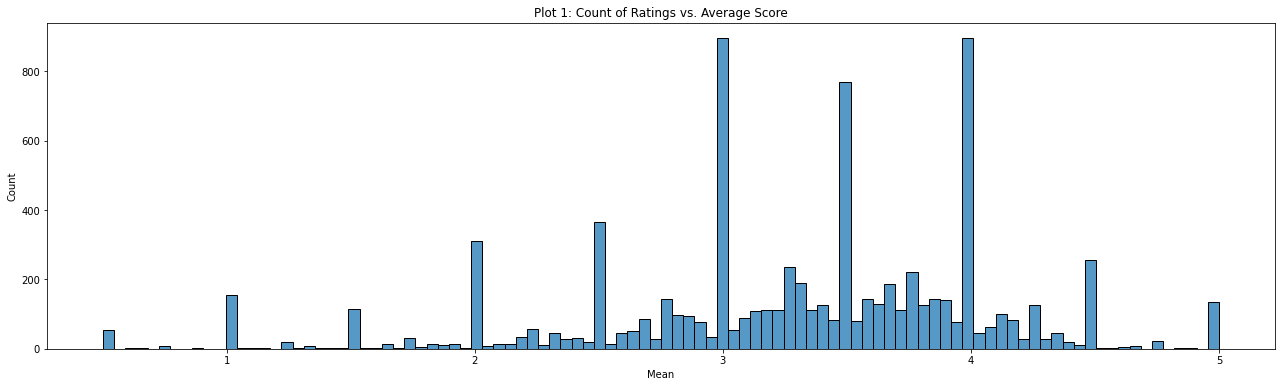

In [68]:
plt.figure(figsize=(22,6))
mean_plot = sns.histplot(data=df_avg, x=df_avg['mean'], bins=100)
mean_plot.set(xlabel='Mean', ylabel='Count', title='Plot 1: Count of Ratings vs. Average Score')

Huge spikes occur at the whole numbers

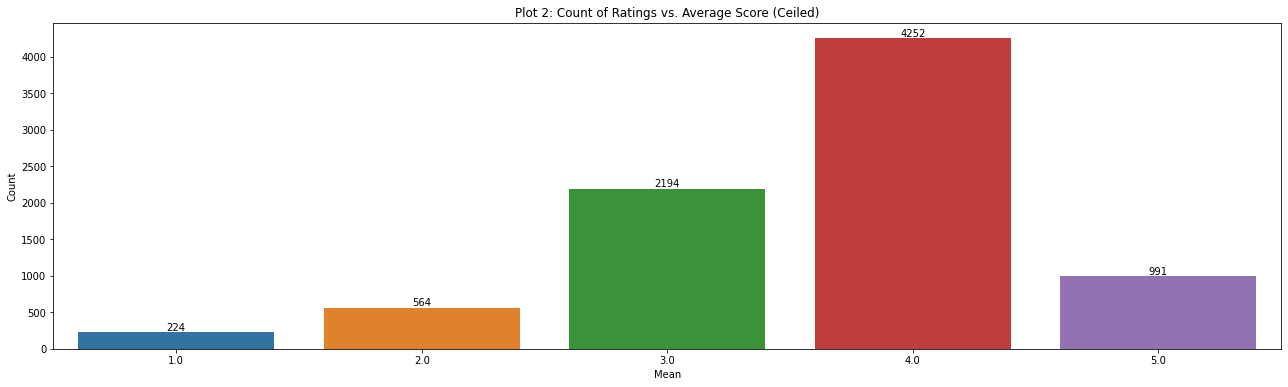

In [79]:
plt.figure(figsize=(22,6))
mean_plot = sns.countplot(data=df_avg, x=df_avg['mean'].apply(np.ceil))
mean_plot.bar_label(mean_plot.containers[0])
mean_plot.set(xlabel='Mean', ylabel='Count', title='Plot 2: Count of Ratings vs. Average Score (Ceiled)')
plt.show()

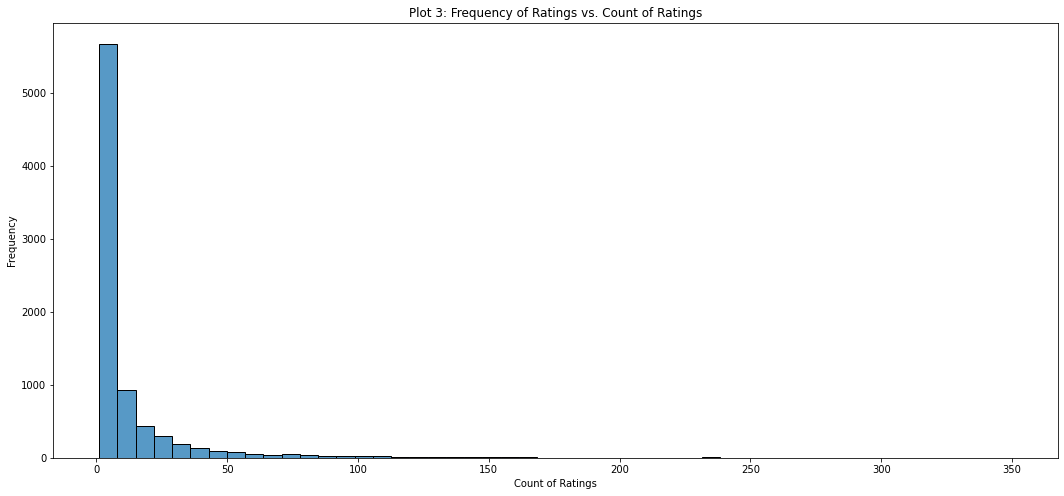

In [71]:
plt.figure(figsize=(18,8))
count_plot = sns.histplot(data=df_avg, x='count', bins=50)
count_plot.set(xlabel='Count of Ratings', ylabel='Frequency', title='Plot 3: Frequency of Ratings vs. Count of Ratings')
plt.show()

<Figure size 1512x576 with 0 Axes>

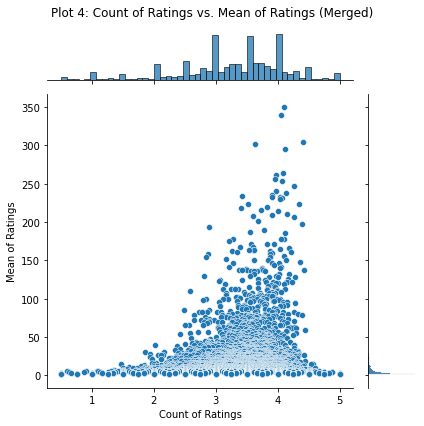

In [77]:
plt.figure(figsize=(21,8))
merged_plot = sns.jointplot(data=df_avg, x='mean', y='count')
merged_plot.set_axis_labels('Count of Ratings', 'Mean of Ratings')
merged_plot.fig.suptitle('Plot 4: Count of Ratings vs. Mean of Ratings (Merged)')
plt.tight_layout()
plt.show()

**Insights**

- Plot 1 and 2 - Most of the movies are rated around 3-4, showing a slightly-left-skewed Gaussian distribution
- Plot 3 - Most of the movies have less than 50 ratings
- Plot 4 - The Jointplot confirms the idea that many of the reviews rate more movies around 3 or 4

### Development

In [ ]:
df_avg.describe()

,count,mean
count,8225.000000,8225.000000
mean,12.157933,3.281388
std,25.873208,0.815626
min,1.000000,0.500000
25%,1.000000,2.932432
50%,3.000000,3.416667
75%,10.000000,3.887097
max,350.000000,5.000000
